In [ ]:
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (10,) and arg 1 with shape (0,).

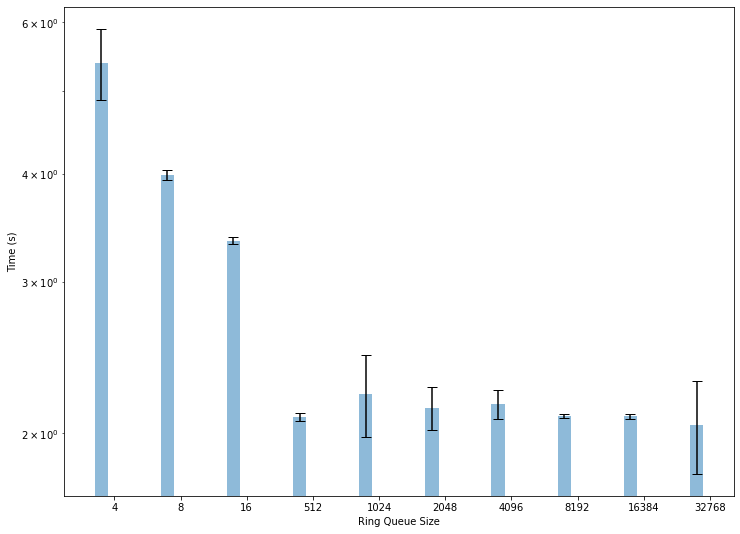

In [ ]:
# fh = open("sf_buffer_test_results.json")
data = pd.read_json("mf_num_files_results.json")['data']
fcp = data['fcp']
cp = data['cp']

count = 1

def get_x(x):
    ret = []
    for item in x:
        if item < 1024:
            ret.append(str(item) + "KB")
        elif item/1024 < 1024:
            ret.append(str(item/1024) + "MB")
        elif item/1024/1024 < 1024:
            ret.append(str(item/1024/1024) + "GB")
        else:
            ret.append(str(item/1024/1024/1024) + "TB")
    return ret

x_fcp = fcp['num_files']
y_fcp_real = fcp['real_time_mean']
y_fcp_real_err = fcp['real_time_std_dev']
y_cp_real = cp['real_time_mean']
y_cp_real_err = cp['real_time_std_dev']
y_cp_user = cp['user_time_mean']
y_cp_user_err = cp['user_time_std_dev']
              
def do(start_idx, end_idx):
    global count
    x = x_fcp[start_idx:end_idx]
    y1 = y_fcp_real[start_idx:end_idx]
    y1_err = y_fcp_real_err[start_idx:end_idx]
    y2 = y_cp_real[start_idx:end_idx]
    y2_err = y_cp_real_err[start_idx:end_idx]
    y3 = y_cp_user[start_idx:end_idx]
    y3_err = y_cp_user_err[start_idx:end_idx]

    x_axis = np.arange(len(x))

    plt.xticks(x_axis, x)
    
    width = 0.6
    
    figure = plt.gcf() # get current figure
    figure.set_size_inches(12, 9)
    
    plt.xlabel("Number of Files")
    plt.ylabel("Time (s)")
    
    plt.yscale("log", base=10)
    
    plt.bar(x_axis - 0.2, y1, width=0.2, label="fcp real", yerr=y1_err, alpha=0.5, ecolor='black', capsize=5)
    plt.bar(x_axis, y2, width=0.2, label="cp real", yerr=y2_err, alpha=0.5, ecolor='black', capsize=5)
    # plt.bar(x_axis+0.2, y3, width=0.2, label="cp user", yerr=y3_err, alpha=0.5, ecolor='black', capsize=5)
    plt.title("Multi File vs Number of Files (SSD)")
    plt.legend()
    plt.savefig(f"mf_num_files_pt{count}")
    plt.clf()
    count += 1

do(1, len(x_fcp))